### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import joblib

### Load the dataset

In [2]:
data = pd.read_csv('churn_data.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check the shape of the dataframe

In [4]:
data.shape

(7043, 21)

### Check the Detail information of the dataframe

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Describe the entire dataset

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Display the Null values percentage against every columns (compare to the total number of records)

In [7]:
data.isnull().sum() / data.shape[0] * 100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

### Show all the Duplicate rows from the dataframe

In [8]:
data[data.duplicated(keep='first')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [9]:
data.duplicated().sum()

0

### Please check the data type of each column of the dataframe

In [10]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Drop any unnecessary column

In [11]:
data = data.drop(['customerID'], axis=1)

In [12]:
data.shape

(7043, 20)

### Check from the dataframe whether the column is removed or not

In [13]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Check for Categorical columns

In [14]:
data.select_dtypes(include=['object']).columns.tolist()

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

### Check For Numerical columns

In [15]:
data.select_dtypes(exclude=['object']).columns.tolist()

['SeniorCitizen', 'tenure', 'MonthlyCharges']

## Perform EDA

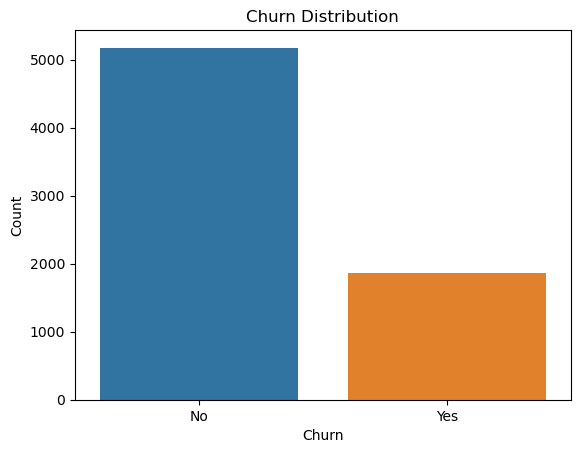

In [16]:
sns.countplot(x='Churn', data=data)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

## Explore the correlation between features

C:\Users\KIIT\AppData\Local\Temp\ipykernel_55852\1083208101.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


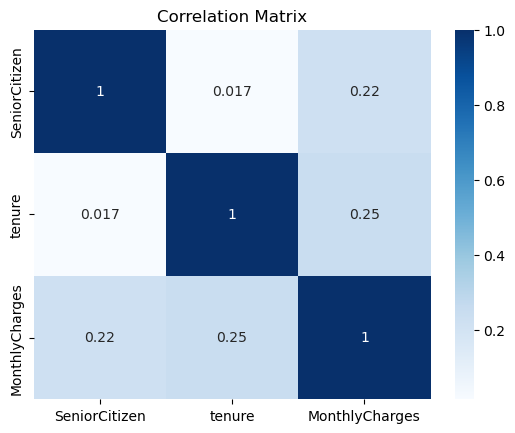

In [17]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

### Define the categorical columns to be label encoded

In [18]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

### Apply label encoding to the categorical columns

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [20]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [21]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

### Convert TotalCharges column to numeric

In [22]:
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)  

### # Standardize numeric features

In [23]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [24]:
data["SeniorCitizen"].nunique()

2

In [25]:
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

### Separate the features (X) and target variable (y)

In [26]:
X = data.drop("Churn", axis=1)
y = data["Churn"]

## Perform feature engineering

### Creating a new feature based on existing columns

In [27]:
data['TenureSquared'] = data['tenure'] ** 2

### Creating binary features based on conditions

In [28]:
data['HasOnlineSecurity'] = np.where(data['OnlineSecurity'] == 'Yes', 1, 0)
data['HasOnlineBackup'] = np.where(data['OnlineBackup'] == 'Yes', 1, 0)

### Binning numerical features into categories

In [29]:
bins = [0, 12, 24, 48, np.inf]
labels = ['0-12', '12-24', '24-48', '48+']
data['TenureCategory'] = pd.cut(data['tenure'], bins=bins, labels=labels)

### Interaction between features

In [30]:
data['MonthlyCharges_Tenure'] = data['MonthlyCharges'] * data['tenure']

## Model Training

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [32]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_encoded = model.predict(X_test_scaled)

# Convert the encoded predicted labels back to the original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Convert the encoded true labels back to the original labels
y_true = label_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_true, y_pred)
confusion_matrix = confusion_matrix(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label='Yes')
recall = recall_score(y_true, y_pred, pos_label='Yes')
f1 = f1_score(y_true, y_pred, pos_label='Yes')

### Print the evaluation metrics

In [33]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8161816891412349
Confusion Matrix:
 [[933 103]
 [156 217]]
Precision: 0.678125
Recall: 0.5817694369973191
F1-score: 0.6262626262626263


### Define the parameter grid for hyperparameter tuning

In [34]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}


### # Perform grid search with cross-validation

In [35]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

### Print the best hyperparameters found

In [36]:
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [37]:
best_model = grid_search.best_estimator_

In [38]:
from sklearn.model_selection import cross_val_score

In [43]:
y_test.shape

(1409,)

In [44]:
y_pred_encoded.shape

(1409,)

In [45]:
cm = confusion_matrix(y_test, y_pred_encoded)

TypeError: 'numpy.ndarray' object is not callable

In [39]:
# Initialize the logistic regression model with the best hyperparameters
best_model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_encoded, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

ValueError: Found input variables with inconsistent numbers of samples: [5634, 7043]